In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import data_utils
import model_utils
import model

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
data = data_utils.load_training_data()

## Training the model

In [49]:
# To get reasonable outputs, should use something bigger than 1000 !
num_epochs = 1000

In [46]:
model_utils.reset_session_and_model()
with tf.Session() as sess:
    train_config = model.ModelConfig()
    test_config = model.ModelConfig()
    train_config.learning_rate = 0.0003
    train_config.num_layers = 1 
    test_config.num_layers = 1
    test_config.batch_size = 1
    test_config.num_steps = 1
    loader = data_utils.DataLoader(data=data,batch_size=train_config.batch_size, num_steps=train_config.num_steps)
    train_model = model.MDNModel(train_config, True)
    test_model = model.MDNModel(test_config, False)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for idx in range(num_epochs):
        epoch_loss = train_model.train_for_epoch(sess, loader)
        print(idx, ' ', epoch_loss)
        if (idx+1) % 100 == 0:
            saver.save(sess, './models/mdnmodel.ckpt', global_step=idx)


Tensor("mdn_model/add_1:0", shape=(40, 72), dtype=float32)
Tensor("mdn_model/strided_slice:0", shape=(40, 24), dtype=float32)
Tensor("mdn_model/Exp:0", shape=(40, 24), dtype=float32)
Tensor("mdn_model/y:0", shape=(4, 10, 1), dtype=float32)
Tensor("mdn_model_1/add_1:0", shape=(1, 72), dtype=float32)
Tensor("mdn_model_1/strided_slice:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model_1/Exp:0", shape=(1, 24), dtype=float32)
0   0.431827
1   0.233722
2   0.137326
3   -0.052699
4   -0.190077
5   -0.25081
6   -0.287086
7   -0.315204
8   -0.327058
9   -0.364067
10   -0.350647
11   -0.401821
12   -0.381067
13   -0.395358
14   -0.412639
15   -0.368245
16   -0.349032
17   -0.400174
18   -0.269344
19   -0.355954
20   -0.401879
21   -0.411356
22   -0.455943
23   -0.47972
24   -0.439804
25   -0.506204
26   -0.500428
27   -0.49995
28   -0.498347
29   -0.52262
30   -0.549799
31   -0.509537
32   -0.549092
33   -0.580703
34   -0.576347
35   -0.576377
36   -0.601378
37   -0.568899
38   -0.545047
39   -

520   -1.42697
521   -1.43368
522   -1.43436
523   -1.40505
524   -1.4861
525   -1.41733
526   -1.43116
527   -1.47988
528   -1.40976
529   -1.45708
530   -1.38817
531   -1.4547
532   -1.3668
533   -1.39897
534   -1.36229
535   -1.41752
536   -1.44553
537   -1.44548
538   -1.4271
539   -1.40308
540   -1.49458
541   -1.3866
542   -1.37773
543   -1.4896
544   -1.48231
545   -1.47779
546   -1.37414
547   -1.51662
548   -1.41149
549   -1.45824
550   -1.38404
551   -1.46995
552   -1.46084
553   -1.4449
554   -1.46149
555   -1.46395
556   -1.38819
557   -1.49133
558   -1.42256
559   -1.46989
560   -1.51439
561   -1.24722
562   -1.19241
563   -1.43353
564   -1.33106
565   -1.44699
566   -1.46531
567   -1.44443
568   -1.40256
569   -1.43579
570   -1.51518
571   -1.39118
572   -1.45018
573   -1.43911
574   -1.34808
575   -1.41311
576   -1.51449
577   -1.45556
578   -1.4342
579   -1.41267
580   -1.554
581   -1.4512
582   -1.40439
583   -1.4971
584   -1.5409
585   -1.45031
586   -1.4949
587   -1.

## Sampling from a trained model

Tensor("mdn_model/add_1:0", shape=(1, 72), dtype=float32)
Tensor("mdn_model/strided_slice:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model/Exp:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model/y:0", shape=(1, 1, 1), dtype=float32)
INFO:tensorflow:Restoring parameters from models/mdnmodel.ckpt-999


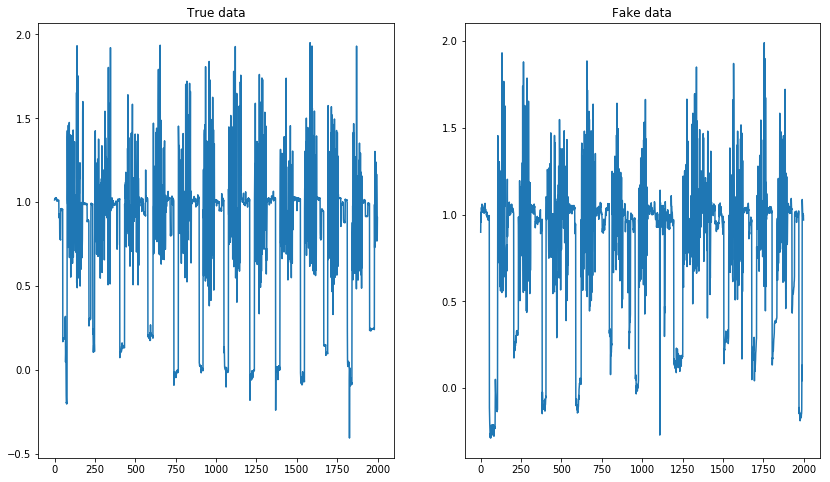

In [72]:
ckpt_path = 'models/mdnmodel.ckpt-999'
seq_len = 2000
model_utils.reset_session_and_model()
true_data = data[0,:2000]
with tf.Session() as sess:
    test_config = model.ModelConfig()
    test_config.num_layers = 1
    test_config.batch_size = 1
    test_config.num_steps = 1
    test_model = model.MDNModel(test_config, True)
    test_model.is_training = False
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, ckpt_path)
    fake_data = test_model.predict(sess, seq_len)
fig, axes = plt.subplots(1,2, figsize=((14,8)))
axes[0].plot(true_data)
axes[0].set_title('True data')
axes[1].plot(fake_data)
axes[1].set_title('Fake data')